In [ ]:
!pip install rasterio

In [2]:
raster_path = r'/content/drive/MyDrive/dl/s2_imagery/Hetauda_S2_2020_12.tif'

## Remove SWIR1 & SWIR2 bands

In [36]:
import rasterio as rio
import numpy as np

In [38]:
src = rio.open(raster_path)
ds = src.read()
src.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': nan,
 'width': 6038,
 'height': 4103,
 'count': 6,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(8.983152841195215e-05, 0.0, 84.68328351866317,
        0.0, -8.983152841195215e-05, 27.653108885636467)}

In [39]:
ds.shape

(6, 4103, 6038)

In [40]:
ds = ds.T
ds.shape

(6038, 4103, 6)

In [41]:
new_raster = ds[:, :, :4]

Text(0.5, 1.0, 'NIR')

/usr/local/lib/python3.10/dist-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


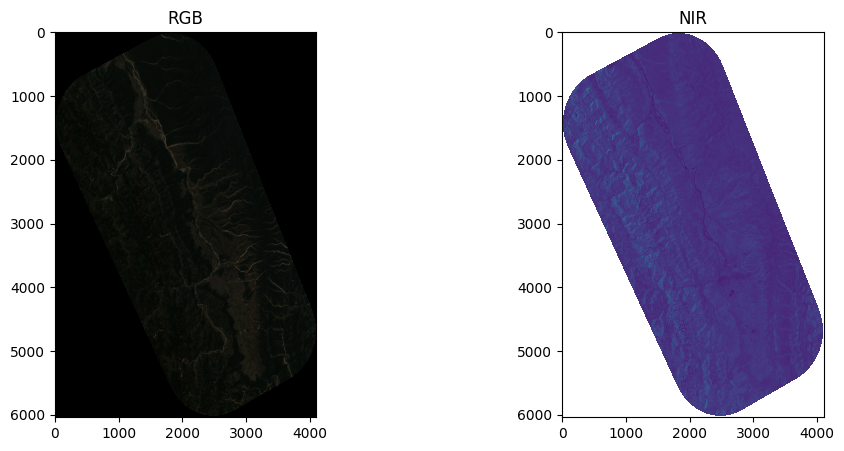

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].imshow(new_raster[:, :, :3])
ax[0].set_title('RGB')
ax[1].imshow(new_raster[:,:,3])
ax[1].set_title('NIR')

In [44]:
out_meta = src.meta
out_meta.update({"count": 4})

new_raster = new_raster.T

with rio.open('/content/new_raster_4bands.tif', 'w', **out_meta) as dst:
  dst.write(new_raster)

## Adding NDVI as new band

In [3]:
import rasterio as rio

src = rio.open(raster_path)
ds = src.read()
ds.shape

(6, 4103, 6038)

In [14]:
out_meta = src.meta
out_meta.update({'count': 7})

In [17]:
src.profile

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 6038, 'height': 4103, 'count': 6, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.983152841195215e-05, 0.0, 84.68328351866317,
       0.0, -8.983152841195215e-05, 27.653108885636467), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}

In [4]:
ds = ds.T

In [5]:
ds.shape

(6038, 4103, 6)

In [32]:
ndvi = (ds[:, :, 3] - ds[:, :, 0]) / (ds[:, :, 3] + ds[:, :, 0])
ndvi.shape

(6038, 4103)

In [33]:
import numpy as np
new_raster = np.zeros((ds.shape[0], ds.shape[1], 7))
new_raster[:, :, :6] = ds
new_raster[:, :, 6] = ndvi
new_raster.shape

(6038, 4103, 7)

In [34]:
np.nanmax(new_raster[:, :, 6]), np.nanmin(new_raster[:, :, 6])

(0.998606264591217, -0.31934934854507446)

Text(0.5, 1.0, 'NDVI')

/usr/local/lib/python3.10/dist-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


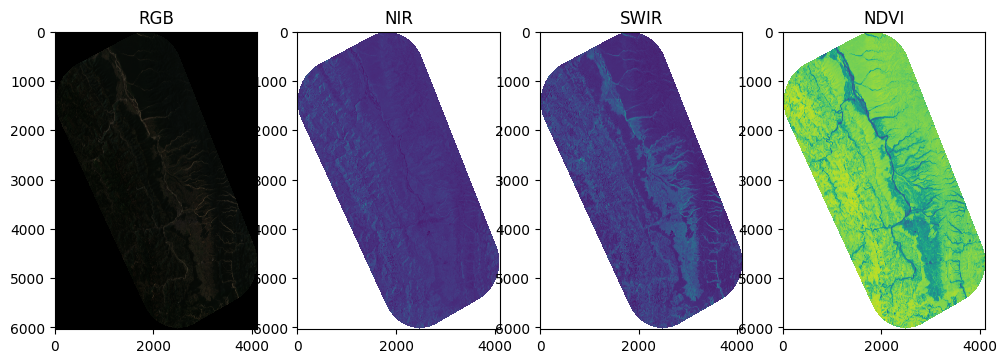

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,4, figsize=(12,5))
ax[0].imshow(new_raster[:, :, :3])
ax[0].set_title('RGB')
ax[1].imshow(new_raster[:,:,3])
ax[1].set_title('NIR')
ax[2].imshow(new_raster[:, :, 4])
ax[2].set_title('SWIR')
ax[3].imshow((new_raster[:, :, 6] + 1) / 3.0)
ax[3].set_title('NDVI')


In [19]:
new_raster = new_raster.T
new_raster.shape

(7, 4103, 6038)

In [21]:
with rio.open('/content/new_raster.tif', 'w', **out_meta) as dst:
  dst.write(new_raster)